## 0. Importado de librerías (valor 0.2) 

**Resuelva los siguientes ejercicios acá mismo en un cuaderno de Jupyter con su nombre, código y la palabra `semana_15`. Importe todas las librerías y funciones que crea convenientes.**

### Estudiante: Francisco Javier Díaz Perdomo COD:201912252
#### NOTA: como son dos archivos para los puntos 1. y 1.1 se generan dos archivos .gif con los nombres brownian_francisco_201912252.gif y fading_francisco_201912252.gif


In [1]:
!python -m pip install pyforest
!python -m pip install matplotlib

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import random as rd
from matplotlib import rcParams
from matplotlib.animation import FuncAnimation 


## 1. Generando una animación del movimiento browniano

La siguiente celda de código genera (con las librerías adecuadas) un par de *arrays* de las posiciones $(x,y)$ de una partícula que sigue un movimiento browniano. El número total de puntos es 200. El objetivo será crear un archivo `.gif` que muestre una animación de dicho movimiento. De hecho, debe generarse un archivo tal como el archivo adjunto al ejercicio llamado `browniand.gif`.

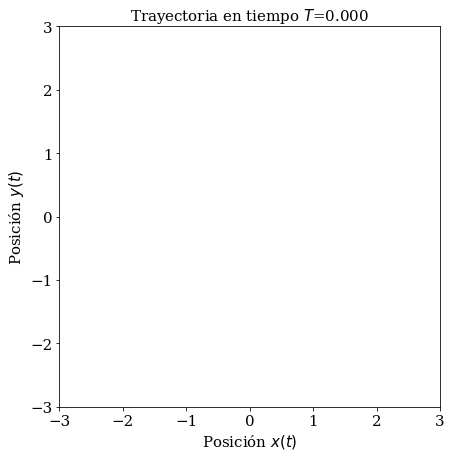

In [2]:
rcParams['font.family'] = 'serif'
npoint=200
rd.seed(50)
xlist=[0]
ylist=[0]
for i in range(npoint-1):
    xp,yp=xlist[-1],ylist[-1]
    r,th=rd.gauss(0,1),rd.uniform(0,1)*np.pi
    xn,yn=r*np.cos(th),r*np.sin(th)
    xlist.append(xn)
    ylist.append(yn)
xlist,ylist=map(np.array,(xlist,ylist))

fsize=15
fig=plt.figure(figsize=(7,7))
ax1= fig.add_subplot(111)
ax1.plot(xlist,ylist,color=(0.7,0.7,0.3,0.8),linewidth=2.3)
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.set_title("Trayectoria en tiempo ", fontsize=fsize)
ax1.set_aspect('equal')
ax1.set_ylabel("Posición $y(t)$",fontsize=fsize)
ax1.set_xlabel("Posición $x(t)$",fontsize=fsize)
ax1.tick_params(labelsize=fsize)

def animate(k):
# Se borra el axis anterior. Es importante que ya se haya definido uno como la gráfica base
# de la celda previa.
# Se grafica
    ax1.clear()
    x=xlist[0:k]
    y=ylist[0:k]
    ax1.plot(x,y,color=(0.7,0.7,0.3,0.8),linewidth=2.3)
# Se define muy bien el aspecto
    ax1.set_xlim(-3,3)
    ax1.set_ylim(-3,3)
    ax1.set_title("Trayectoria en tiempo $T$={0:0.3f}".format(k), fontsize=fsize)
    ax1.set_aspect('equal')
    ax1.set_ylabel("Posición $y(t)$",fontsize=fsize)
    ax1.set_xlabel("Posición $x(t)$",fontsize=fsize)
    ax1.tick_params(labelsize=fsize)
    
ani = FuncAnimation(fig,animate,frames=200,interval=250,repeat=True)
ani.save('brownian_francisco_201912252.gif', writer='imagemagick')

### 1.1. Ejemplo de un cuadro

La siguiente línea de código genera (con las librerías adecuadas) el ejemplo de un cuadro de la animación. Se trata de la trayectoria del momento `k+20` y los 20 momentos anteriores desvaneciéndose en intensidad. Fíjese que se usa la función `plt.plot` en un `for` así que es mejor usar el método simple de generar cada cuadro borrando el anterior (sección 1 del ejemplo). Sin embargo, si usted compara este cuadro con los cuadros de la animación objetivo `browniand.gif`, usted notará que todavía debe configurar varios aspectos de la gráfica. Buena parte de su puntaje de calificación se dará de acuerdo a su capacidad de configurar los cuadros de forma consistente e idéntica a los del archivo objetivo `browniand.gif`. 

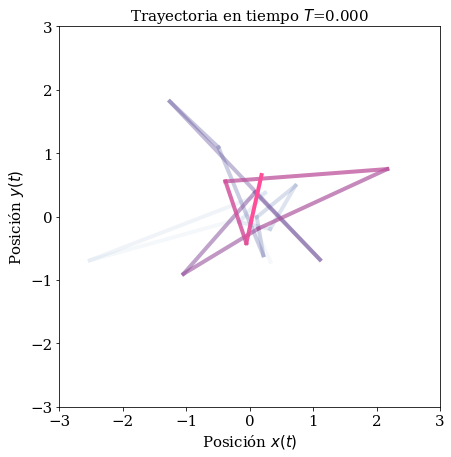

In [3]:
adv=20
hue=(0.1+np.linspace(0,0.9,adv))**2
fsize=15
fig=plt.figure(figsize=(7,7))
ax2 = fig.add_subplot(111)
ax2.plot(xlist,ylist,color=(0.7,0.7,0.3,0.8),linewidth=2.3)
ax2.set_xlim(-3,3) 
ax2.set_ylim(-3,3)
ax2.set_title("Trayectoria en tiempo", fontsize=fsize)
ax2.set_aspect('equal')
ax2.set_ylabel("Posición $y(t)$",fontsize=fsize)
ax2.set_xlabel("Posición $x(t)$",fontsize=fsize)
ax2.tick_params(labelsize=fsize)

def animate(k):
# Se borra el axis anterior. Es importante que ya se haya definido uno como la gráfica base
# de la celda previa.
# Se grafica
    ax2.clear()
    for j in range(adv):
        i=k+j
        plt.plot(xlist[i:i+2],ylist[i:i+2],color=(hue[j],0.3,0.6,hue[j]),linewidth=4)
# Se define muy bien el aspecto
    ax2.set_xlim(-3,3)
    ax2.set_ylim(-3,3)
    ax2.set_title("Trayectoria en tiempo $T$={0:0.3f}".format(k), fontsize=fsize)
    ax2.set_aspect('equal')
    ax2.set_ylabel("Posición $y(t)$",fontsize=fsize)
    ax2.set_xlabel("Posición $x(t)$",fontsize=fsize)
    ax2.tick_params(labelsize=fsize)
    
ani = FuncAnimation(fig,animate,frames=180,interval=250,repeat=True)
ani.save('fading_francisco_201912252.gif', writer='imagemagick')

### 1.2 Sistema de calificación

Su calificación se hará de acuerdo al siguiente sistema de puntajes (más el 0.2 de la importación de librerías):
1. (0.3) Define adecuadamente que la gráfica siempre se mantenga en los valores de $(x,y)\in[-3,3]^2$ (límites de $x$ y $y$).
2. (0.3) Se asegura de que la gráfica tenga un título variable según el instante $T$ igual al valor de `k` tal como se muestra en el archivo `browniand.gif`.
3. (0.3) Los títulos de los ejes son tales como se muestra en el archivo `browniand.gif`.
4. (0.3) Se asegura de que el aspecto de la gráfica sea cuadrado. La línea de configuración de `fig` debería ser: `fig=plt.figure(figsize=(7,7))`. Y el tamaño de todas las fuentes es igual a 15.
5. (0.3) Los cuadros deben cambiar cada 250 milisegundos, y el número de cuadros deberá ser 180 a partir de `k=0`. 
6. (1.3) Logra generar un archivo  `nombre_codigo.gif` de salida con la animación pedida. Fíjese que el nombre del archivo es individual. NOTA: como son dos archivos para los puntos 1. y 1.1 se generan dos archivos .gif con los nombres brownian_francisco_201912252.gif y fading_francisco_201912252.gif
7. (1.0) Demuestra que entiende la construcción de la función `animate`, borrando adecuadamente el cuadro anterior, etc.
8. (1.0) Demuesta que entiende el uso de la función `FuncAnimation`.